# HW3-Q1: PCA & T-SNE

HW3-Q1 is required to finish the following the tasks with this incomplete Notebook file. Before you start, you need to install the [MulticoreTSNE](https://github.com/DmitryUlyanov/Multicore-TSNE) and download the test set of [Fashion-MNIST dataset](https://github.com/zalandoresearch/fashion-mnist). Some instructions are given as follows.
- Install MulticoreTSNE by `pip install MulticoreTSNE`, and you may need `pip install cmake` first; Otherwise, you could build it from scratch.
- Download the testset files, `t10k-images-idx3-ubyte.gz` and `t10k-labels-idx1-ubyte.gz`, and save them to your own data path.

Please follow the instructions from HW2 to get the PDF submission with this notebook file.

In [ ]:
# !pip install cmake
# !pip install MulticoreTSNE

### HW3-Q1a: Load data and get the PCA embeddings (20 pts)

This part only requires you to set up the environment (installing dependency and download data) and run the following codes.

In [12]:
%matplotlib inline

import time
import numpy as np
from sklearn import linear_model
from sklearn.datasets import load_digits
import matplotlib.pyplot as plt 
from sklearn.preprocessing import StandardScaler

from sklearn.decomposition import PCA
from sklearn.manifold import TSNE
from MulticoreTSNE import MulticoreTSNE

def load_mnist(path, kind='train'):
    import os
    import gzip
    """Load MNIST data from `path`"""
    labels_path = os.path.join(path,
                               '%s-labels-idx1-ubyte.gz'
                               % kind)
    images_path = os.path.join(path,
                               '%s-images-idx3-ubyte.gz'
                               % kind)
    with gzip.open(labels_path, 'rb') as lbpath:
        labels = np.frombuffer(lbpath.read(), dtype=np.uint8,
                               offset=8)
    with gzip.open(images_path, 'rb') as imgpath:
        images = np.frombuffer(imgpath.read(), dtype=np.uint8,
                               offset=16).reshape(len(labels), 784)
    return images, labels

# Download the fashion-mnist dataset into your own File Path
datapath = '/Users/lin/Desktop' #'./dataset' # Change this path to your own file path
# We only use the testing set of Fashion-Mnist
data, gnd = load_mnist(datapath, kind='t10k')
K = len(set(gnd))
# We simply made labels from 0-K
semantic_labels = list(range(K))
# normalzied features to range [0,1]
data = data / 255.
# Do some preprocessing for the data
scaler = StandardScaler().fit(data)
X = scaler.transform(data)
N, D = X.shape
print('Dataset is with size={} and {}-dimension features of {} classes'.format(N, D, K))
print(semantic_labels)
# We set M=2 as the target reduced dimension size, for a straightforward visualization purpose
M = 2
# Instantiate PCA model fist
pca = PCA(n_components=M)
# Train the pca model by taking the fist M eigenvectors
t0 = time.time()
X_pca = pca.fit_transform(X)
print('PCA training and inference time = {:.4f}'.format(time.time()-t0))
print(X_pca.shape)

Dataset is with size=10000 and 784-dimension features of 10 classes
[0, 1, 2, 3, 4, 5, 6, 7, 8, 9]
PCA training and inference time = 0.2254
(10000, 2)


### HW3-Q1b: T-SNE Embeddings (20 pts)
Obtain the T-SEN embeddings with the given Sklearn model and MulticoreTSNE model, respectively. Compare their total running time (just print their running time accordingly).

In [13]:
# Instantiate TSEN model with Sk-learn implmentation
tsne1 = TSNE(n_components=M)
# TODO
t0 = time.time()
X_tsne1 = tsne1.fit_transform(X)
print('Sklearn T-SNE training and inference time = {:.4f}'.format(time.time()-t0))

# Instantiate TSEN model with MulticoreTSNE implementation
tsne2 = MulticoreTSNE(n_components=M, n_jobs=8)
# TODO
t0 = time.time()
X_tsne2 = tsne2.fit_transform(X)
print('Multicore T-SNE training and inference time = {:.4f}'.format(time.time()-t0))


Sklearn T-SNE training and inference time = 180.3398
Multicore T-SNE training and inference time = 78.3464


### HW3-Q1c: T-SNE Embeddings visualization (20 pts)

Plot the T-SNE Embeddings and compare it with the PCA Embeddings.

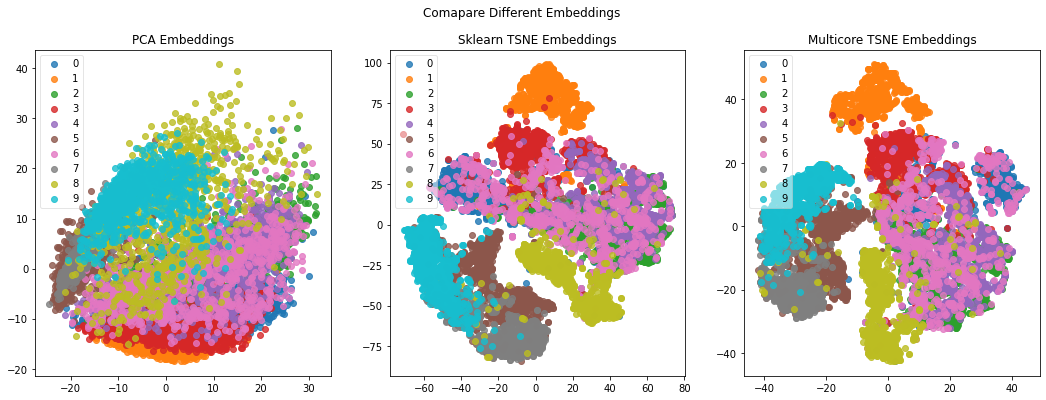

In [16]:
import seaborn as sns
# sns.set_theme()

fig, (ax1, ax2, ax3) = plt.subplots(1, 3, figsize=(18,6))
fig.suptitle('Comapare Different Embeddings')
ax1.set_title('PCA Embeddings')
ax2.set_title('Sklearn TSNE Embeddings')
ax3.set_title('Multicore TSNE Embeddings')

for i in range(K):
    ax1.scatter(X_pca[gnd == i, 0], X_pca[gnd == i, 1], alpha=.8, label=semantic_labels[i])
    ax2.scatter(X_tsne1[gnd == i, 0], X_tsne1[gnd == i, 1], alpha=.8, label=semantic_labels[i])
    ax3.scatter(X_tsne2[gnd == i, 0], X_tsne2[gnd == i, 1], alpha=.8, label=semantic_labels[i])
ax1.legend(fancybox=True, framealpha=0.5)

# TODO: add legends for ax2 and ax3
ax2.legend(fancybox=True, framealpha=0.5)
ax3.legend(fancybox=True, framealpha=0.5)

plt.show()

Answer the following questions:
- Why T-SEN could lead to a better visualization than PCA?

**Hint**: Recall the purpose of using Student's t-distribution.

Please directly answer the above question with Markdown inside this notebook file.